## Import libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [10,5]
sns.set_style('darkgrid')

## Import dataset
Let's check the head and summary of our data.

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


We will be dropping the first three columns. We wil only use the numerical one.

In [5]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

## Exploratory data analysis

Text(0.5, 0, 'Average Session Length')

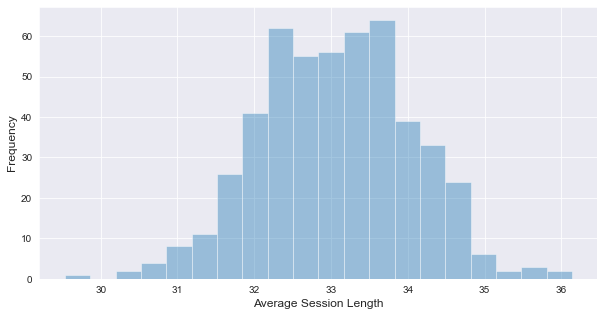

In [6]:
sns.distplot(df['Avg. Session Length'],kde=False)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Average Session Length',fontsize=12)

Most of the customers spend between 32 to 34 minutes on average.

Text(0.5, 0, 'Minutes')

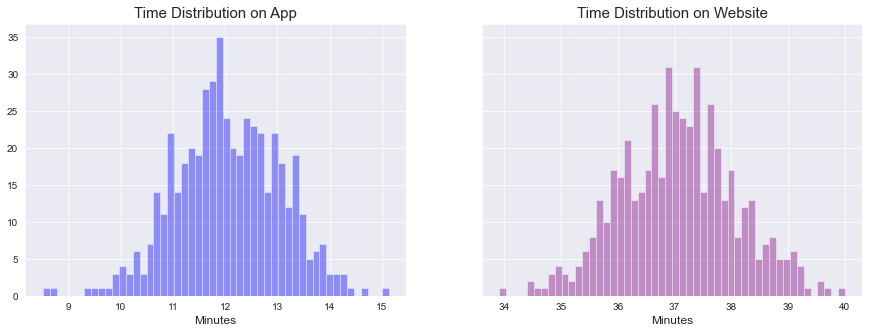

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.distplot(df['Time on App'],bins=50,kde=False, ax=ax[0],color='blue')
ax[0].set_title('Time Distribution on App',fontsize=15)
ax[0].set_xlabel('Minutes',fontsize=12)

sns.distplot(df['Time on Website'],bins=50,kde=False, ax=ax[1],color='purple')
ax[1].set_title('Time Distribution on Website',fontsize=15)
ax[1].set_xlabel('Minutes',fontsize=12)


Customers spend an average of 12 minutes on app meanwhile, on website, they spend 37 minutes on average.

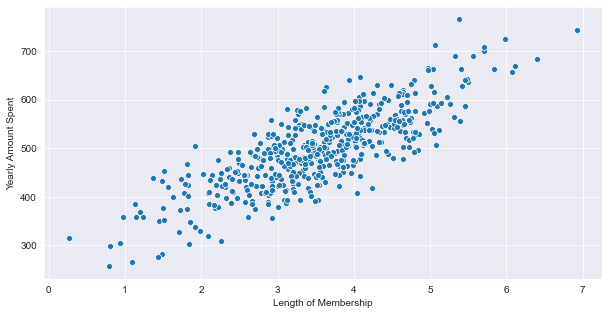

In [8]:
sns.scatterplot(df['Length of Membership'], df['Yearly Amount Spent'])

We can see positive correlation here. The longer the membership length, the higher the amount spent.

## Building a Linear Regression model
Let's build our model. Before that, we need to split our data into training and test sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Yearly Amount Spent',axis=1)
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
prediction = model.predict(X_test)

## Evaluation

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))

RMSE: 9.65046066622479


In [17]:
df['Yearly Amount Spent'].mean()

499.31403825859053

9.3 is about 0.02% to out target mean. We can say that our RMSE is quite good. 

Let's evaluate the coefficients of our variables.

In [18]:
coef = pd.DataFrame(model.coef_,index=X_train.columns,columns=['Coefficients'])

In [19]:
coef

,Coefficients
Avg. Session Length,25.856345
Time on App,38.740972
Time on Website,0.579235
Length of Membership,61.783481


How we can interpret these coefficients?
- every unit increase in average session length, the yearly amount spent is increased by 25.85 dollars.
- every unit increase in time on app, the yearly amount spent is increased by 38.3 dollars.
- every unit increase in time on website, the yearly amount spent is increased by 0.3 dollars.
- every unit increase in average session length, the yearly amount spent is increased by 61.85length of membership dollars.

In conclusion, there are two things we learned from the coefficients. The company can either focus more on the app since it gives high increase in yearly amount spent or develop the website so that it catch up with the app.